In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

from unityagents import UnityEnvironment

In [2]:
# single agent
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe') 

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33


In [4]:
# DDPG agent initialization 
agent = Agent(state_size=env_info.vector_observations.shape[1], action_size=brain.vector_action_space_size, random_seed=40)

In [5]:
n_episodes = 700
max_t = 2000
save_episodes = 100
scores_deque = deque(maxlen=save_episodes)
scores = []
avg_scores = []

print_every = 1

start_time = time.time()

for i_episode in range(1, n_episodes+1):
    
    agent.reset()                                          # reset agent 
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    score = np.zeros(num_agents)                          # initialize the score (for each agent)
    
    for t in range(max_t):

        actions = agent.act(states)
        actions = np.clip(actions, -1, 1) 

        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished        
        score += env_info.rewards                         # update the score (for each agent)
        
        agent.step(states, actions, rewards, next_states, dones)
        states = next_states                               # roll over states to next time step
        
        if np.any(dones):
            break 
    
    # average score of 20 agents
    score = np.mean(score)
    scores_deque.append(score)
    scores.append(score)
    avg_scores.append(np.mean(scores_deque))
        
    if np.mean(scores_deque) >= 30:
        # the agent achieve average of 30 for 100 consecutive episodes
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_single.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_single.pth')
        print('\rFinish on Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        break 
    
    if i_episode % print_every == 0:
        # training time
        end_time = time.time()
        total_train_time = end_time - start_time
        start_time = time.time()
        
        print('\rEpisode {}\tAverage Score: {:.2f} \tMax Score: {:.2f} \tScore: {:.2f} \tTime: {}'.format(i_episode, 
                                                                                     np.mean(scores_deque),
                                                                                     np.max(scores_deque),                     
                                                                                     score, 
                                                                                     datetime.timedelta(seconds=int(total_train_time))))#, end="")

    if i_episode % save_episodes == 0:
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_single.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_single.pth')
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   

Episode 1	Average Score: 0.61 	Max Score: 0.61 	Score: 0.61 	Time: 0:00:14
Episode 2	Average Score: 0.46 	Max Score: 0.61 	Score: 0.32 	Time: 0:00:18
Episode 3	Average Score: 0.77 	Max Score: 1.37 	Score: 1.37 	Time: 0:00:18
Episode 4	Average Score: 0.71 	Max Score: 1.37 	Score: 0.56 	Time: 0:00:18
Episode 5	Average Score: 0.76 	Max Score: 1.37 	Score: 0.92 	Time: 0:00:18
Episode 6	Average Score: 0.73 	Max Score: 1.37 	Score: 0.62 	Time: 0:00:17
Episode 7	Average Score: 0.71 	Max Score: 1.37 	Score: 0.56 	Time: 0:00:17
Episode 8	Average Score: 0.78 	Max Score: 1.37 	Score: 1.29 	Time: 0:00:17
Episode 9	Average Score: 0.84 	Max Score: 1.37 	Score: 1.35 	Time: 0:00:17
Episode 10	Average Score: 0.87 	Max Score: 1.37 	Score: 1.14 	Time: 0:00:17
Episode 11	Average Score: 0.84 	Max Score: 1.37 	Score: 0.54 	Time: 0:00:17
Episode 12	Average Score: 0.81 	Max Score: 1.37 	Score: 0.41 	Time: 0:00:17
Episode 13	Average Score: 0.88 	Max Score: 1.71 	Score: 1.71 	Time: 0:00:17
Episode 14	Average Sc

Episode 108	Average Score: 5.01 	Max Score: 19.94 	Score: 5.30 	Time: 0:00:18
Episode 109	Average Score: 5.11 	Max Score: 19.94 	Score: 11.35 	Time: 0:00:18
Episode 110	Average Score: 5.24 	Max Score: 19.94 	Score: 14.72 	Time: 0:00:18
Episode 111	Average Score: 5.37 	Max Score: 19.94 	Score: 12.75 	Time: 0:00:18
Episode 112	Average Score: 5.48 	Max Score: 19.94 	Score: 11.30 	Time: 0:00:18
Episode 113	Average Score: 5.59 	Max Score: 19.94 	Score: 13.39 	Time: 0:00:18
Episode 114	Average Score: 5.69 	Max Score: 19.94 	Score: 11.04 	Time: 0:00:18
Episode 115	Average Score: 5.79 	Max Score: 19.94 	Score: 11.14 	Time: 0:00:18
Episode 116	Average Score: 5.90 	Max Score: 19.94 	Score: 11.77 	Time: 0:00:18
Episode 117	Average Score: 6.09 	Max Score: 19.94 	Score: 19.35 	Time: 0:00:18
Episode 118	Average Score: 6.19 	Max Score: 19.94 	Score: 10.16 	Time: 0:00:18
Episode 119	Average Score: 6.43 	Max Score: 24.03 	Score: 24.03 	Time: 0:00:18
Episode 120	Average Score: 6.58 	Max Score: 24.03 	Sc

Episode 211	Average Score: 29.57 	Max Score: 39.29 	Score: 34.75 	Time: 0:00:19
Episode 212	Average Score: 29.82 	Max Score: 39.29 	Score: 36.52 	Time: 0:00:19
Episode 213	Average Score: 29.96 	Max Score: 39.29 	Score: 27.43 	Time: 0:00:19
Finish on Episode 214	Average Score: 30.22


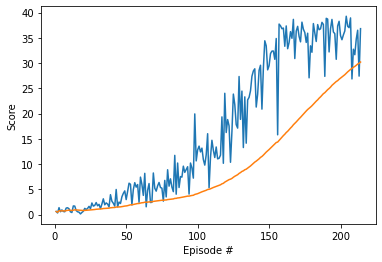

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
env.close()